
# Project: analyzing IMDB Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### analyzing of any data will give us insights so we could get the most benifits from our investment. so, if we analyze an old data we can get prediction of what features will give us the most revnue. that is what i will do in this notebook. i will search for what revneue depends on the most and who is the most popular actor we could ask him\her to act in the film. 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling



### the data i will use has many defects : 1- there are many features which are not useful to me so i will drop it using drop() function                                                                                                                                                                            2- since the data is relativily large so i can drop the rows which contains misiing values without being affected using .dropna() function

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
df=pd.read_csv("tmdb-movies.csv")
#   types and look for instances of missing or possibly errant data.
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [7]:
df.drop(["id","imdb_id","homepage","tagline","production_companies","keywords","runtime","release_date","budget_adj","revenue_adj"],axis=1,inplace=True)

In [8]:
df.head()

,popularity,budget,revenue,original_title,cast,director,overview,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,Action|Crime|Thriller,2947,7.3,2015


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10866 non-null  float64
 1   budget          10866 non-null  int64  
 2   revenue         10866 non-null  int64  
 3   original_title  10866 non-null  object 
 4   cast            10790 non-null  object 
 5   director        10822 non-null  object 
 6   overview        10862 non-null  object 
 7   genres          10843 non-null  object 
 8   vote_count      10866 non-null  int64  
 9   vote_average    10866 non-null  float64
 10  release_year    10866 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 933.9+ KB


In [10]:
df.dropna(inplace=True)

In [11]:
df.drop_duplicates()

,popularity,budget,revenue,original_title,cast,director,overview,genres,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,Action|Crime|Thriller,2947,7.3,2015
...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,"The Endless Summer, by Bruce Brown, is one of ...",Documentary,11,7.4,1966
10862,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,Grand Prix driver Pete Aron is fired by his te...,Action|Adventure|Drama,20,5.7,1966
10863,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,An insurance agent who moonlights as a carthie...,Mystery|Comedy,11,6.5,1966
10864,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,"In comic Woody Allen's film debut, he took the...",Action|Comedy,22,5.4,1966


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10730 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10730 non-null  float64
 1   budget          10730 non-null  int64  
 2   revenue         10730 non-null  int64  
 3   original_title  10730 non-null  object 
 4   cast            10730 non-null  object 
 5   director        10730 non-null  object 
 6   overview        10730 non-null  object 
 7   genres          10730 non-null  object 
 8   vote_count      10730 non-null  int64  
 9   vote_average    10730 non-null  float64
 10  release_year    10730 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 1005.9+ KB


<a id='eda'></a>
## Exploratory Data Analysis



## What kinds of properties are associated with movies that have high revenues?

In [13]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.corr()

,popularity,budget,revenue,vote_count,vote_average,release_year
popularity,1.000000,0.544214,0.662833,0.800613,0.217847,0.093104
budget,0.544214,1.000000,0.734453,0.632046,0.087181,0.119107
revenue,0.662833,0.734453,1.000000,0.790885,0.178452,0.059102
vote_count,0.800613,0.632046,0.790885,1.000000,0.260520,0.110360
vote_average,0.217847,0.087181,0.178452,0.260520,1.000000,-0.127670
release_year,0.093104,0.119107,0.059102,0.110360,-0.127670,1.000000


## from the above output we can concolude that the revenue depends the most on 3 main features respectively : 
### 1- vote_count
### 2- budget
### 3- popularity

### I will visualize the relation between the revenue and those featuers to show the positive correlation between them and make it easier and clearly to understand without looking to the numerical statistics 

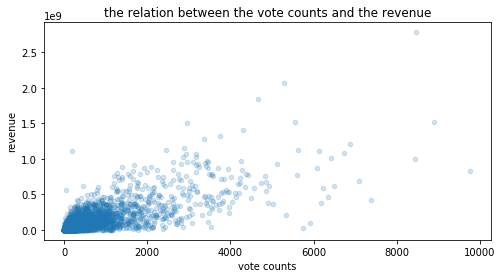

In [18]:
df.plot(kind="scatter",x="vote_count",y="revenue",figsize=(8,4),alpha=0.2)
plt.title("the relation between the vote counts and the revenue")
plt.xlabel("vote counts")
plt.ylabel("revenue")
plt.show()

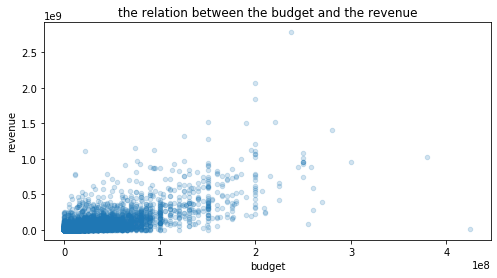

In [19]:
df.plot(kind="scatter",x="budget",y="revenue",figsize=(8,4),alpha=0.2)
plt.title("the relation between the budget and the revenue")
plt.xlabel("budget")
plt.ylabel("revenue")
plt.show()

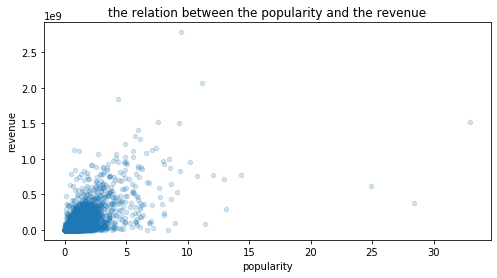

In [20]:
df.plot(kind="scatter",x="popularity",y="revenue",figsize=(8,4),alpha=0.2)
plt.title("the relation between the popularity and the revenue")
plt.xlabel("popularity")
plt.ylabel("revenue")
plt.show()

### so, it's obivious that revenue has a positive correlation with each of the three mentioned features

## Who is the most frequent actor?

In [21]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df["cast"].head()

0    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
1    Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...
2    Shailene Woodley|Theo James|Kate Winslet|Ansel...
3    Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...
4    Vin Diesel|Paul Walker|Jason Statham|Michelle ...
Name: cast, dtype: object

In [22]:
actors= df["cast"].str.cat(sep="|")
actor=pd.Series(actors.split('|'))
a=actor.value_counts(ascending=False)
a

Robert De Niro       72
Samuel L. Jackson    71
Bruce Willis         62
Nicolas Cage         61
Michael Caine        53
                     ..
Beth Moore            1
James Cavlo           1
Marcel Bozzuffi       1
Patricia Schumann     1
Nicholas Farrell      1
Length: 18924, dtype: int64

In [23]:
top_10=a.head(10)

### I will visualize the results i have got to show the most frequent actor easily 

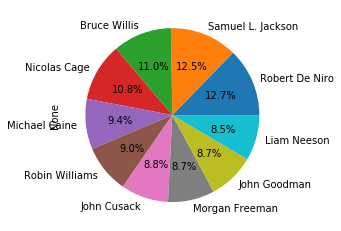

In [24]:
top_10.plot(kind="pie",autopct="%.1f%%")

## so it's obivious that Robert De Niro is the most frequent actor 

### Q3 :Which Genre Has The Highest Release Of Movies ?

In [24]:
df["genres"].value_counts()

Drama                                          710
Comedy                                         706
Drama|Romance                                  289
Comedy|Drama                                   280
Documentary                                    274
                                              ... 
Thriller|Action|Fantasy|Horror                   1
Comedy|Drama|Family|Fantasy|Science Fiction      1
Comedy|Thriller|Crime|Foreign                    1
History|Drama|Thriller                           1
Horror|TV Movie                                  1
Name: genres, Length: 2022, dtype: int64

In [25]:
genre=df["genres"].str.cat(sep="|")
gen=pd.Series(genre.split('|'))
g=gen.value_counts(ascending=False)
g

Drama              4747
Comedy             3774
Thriller           2903
Action             2377
Romance            1707
Horror             1636
Adventure          1465
Crime              1354
Science Fiction    1222
Family             1214
Fantasy             908
Mystery             808
Animation           664
Documentary         470
Music               398
History             330
War                 268
Foreign             184
Western             164
TV Movie            162
dtype: int64

In [26]:
top_genres = g.head(10)
top_genres

Drama              4747
Comedy             3774
Thriller           2903
Action             2377
Romance            1707
Horror             1636
Adventure          1465
Crime              1354
Science Fiction    1222
Family             1214
dtype: int64

### I will visualize the genres to show the top genre without looking to any statistics

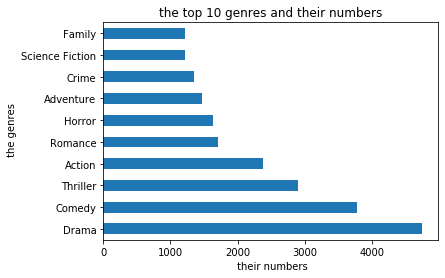

In [27]:
top_genres.plot(kind="barh")
plt.title("the top 10 genres and their numbers")
plt.xlabel(" their numbers")
plt.ylabel(" the genres")
plt.show()

<a id='conclusions'></a>
## Conclusions
### What kinds of properties are associated with movies that have high revenues?
#### first I have calculated the correlation between the features to know whic featueres that the revnue depends on, then I concluded that it depends mainly on three features which are the vote_count , the budget & the popularity. so i visualize it to make it more clearely to understand without looking to the numbers. so, i have got that all of these featuers correlated positively with the revenue.
### Who is the most frequent actor?
#### at first i noticed that there is no columns for each actor but there is only one column contains the whole cast but mainly i want to know who is the most frequent actor in the data so i needed to separate each actor in the cast i did it using first the (str.cat(sep="|")) method then i used (pd.Series(actors.split('|')) ) so i get each actor separately then i arranged them descendingly so i get the top 10 actors and i picked the first one who was Robert De Niro and i visualize it by "Pie" chart to make it clearely.
### Which Genre Has The Highest Release Of Movies ?
#### i've noticed that there are many films which doesn't have only one genre so i splitted the genres to each genre as i did with the acotors then i arranged them descendingly so i get the top 10 and i concluded that Drama has the highest release of the movies the i visualized it by the "barh" chart to make it clearely.

### additional information could be useful to improve analysis :
#### since we get the most frequent actor and the most popular genre we can study the relation between the revenue and these features so we can get the most benifit
### Data 
#### the data has been very useful to me to do my analysis and get these results although it had many features i didn't need so i dropped it, also it contained missing values and since the dataset won't be affected if i dropped these rows so, idropped them.
### References
#### https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.barh.html
#### https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.cat.html
